# Excercise 1 - Generated Quantities Block
1. Compile code_1.stan and sample from it using M=F
2. Create a pandas dataframe from resulting draws.
3. Plot a histogram for each of y_sim and lambda

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
samples = gen_quant.sample(data={'M':7}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [5]:
#Create a pandas dataframe from resulting draws.
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6],y_sim[7]
0,0.0,0.0,70.67480,81.0,79.0,50.0,62.0,75.0,62.0,80.0
1,0.0,0.0,142.83300,114.0,125.0,116.0,153.0,138.0,149.0,149.0
2,0.0,0.0,206.85700,172.0,209.0,200.0,220.0,202.0,181.0,217.0
3,0.0,0.0,227.94500,216.0,256.0,236.0,242.0,247.0,226.0,244.0
4,0.0,0.0,212.55100,212.0,214.0,189.0,213.0,215.0,199.0,208.0
...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,5.84077,6.0,4.0,7.0,5.0,4.0,9.0,8.0
996,0.0,0.0,43.18490,41.0,44.0,42.0,38.0,52.0,48.0,44.0
997,0.0,0.0,257.25000,254.0,259.0,251.0,270.0,252.0,266.0,263.0
998,0.0,0.0,100.54100,92.0,106.0,83.0,94.0,107.0,113.0,94.0


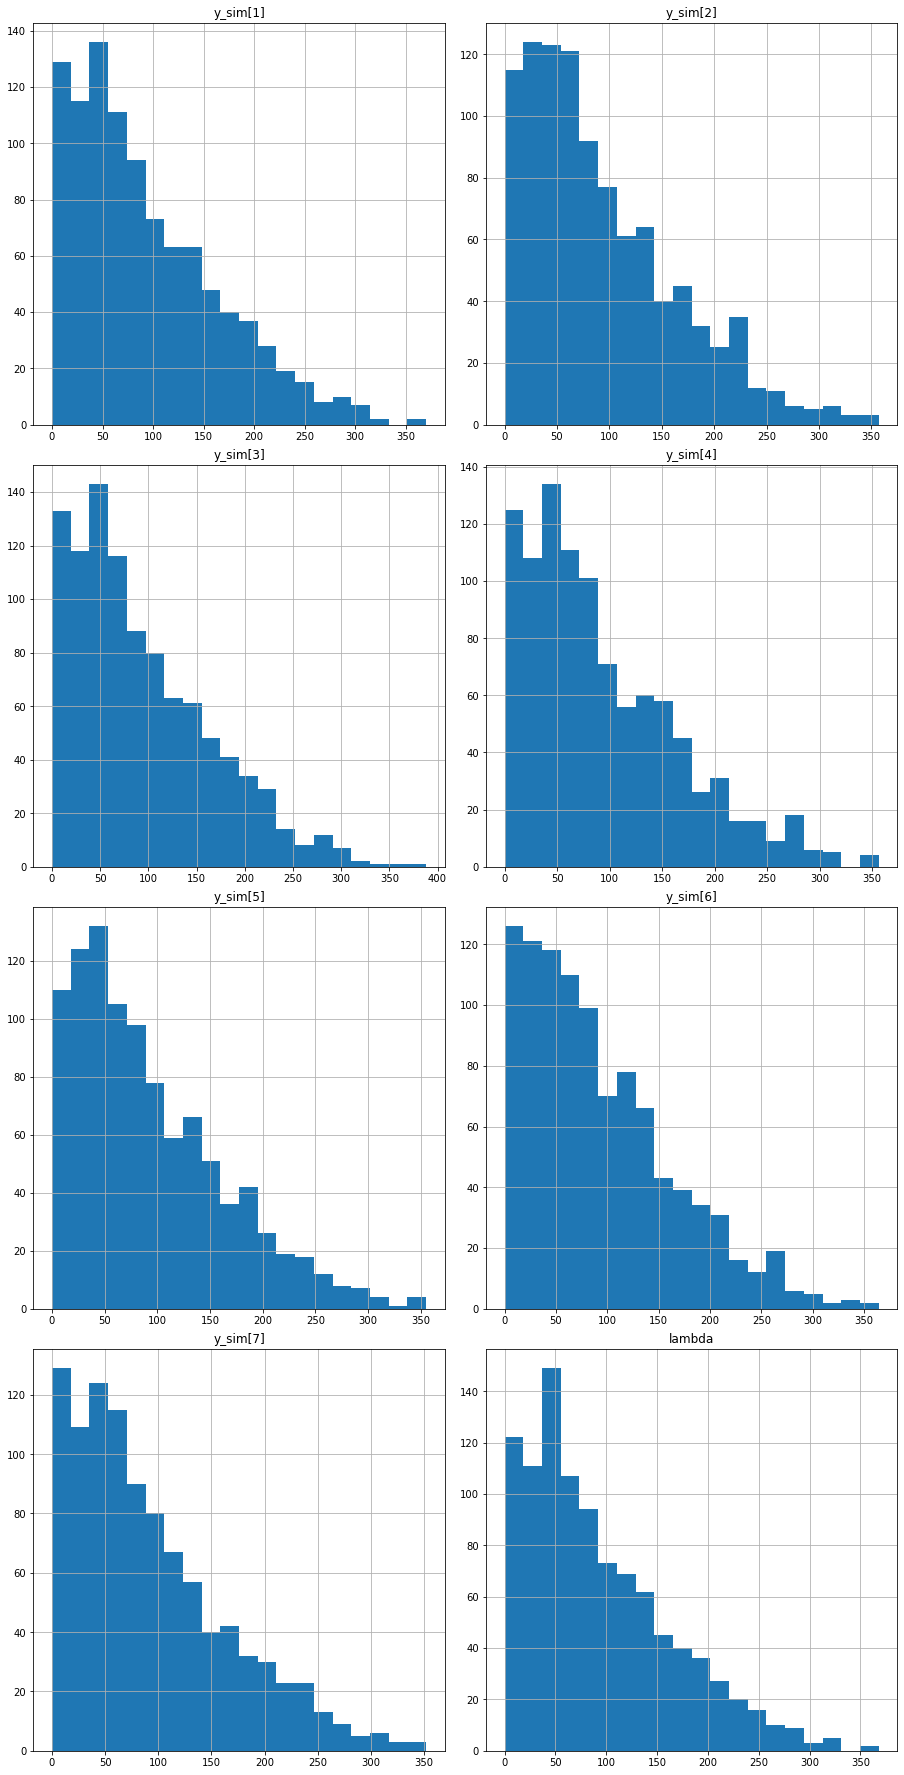

In [6]:
#Plot a histogram for each of y_sim and lambda
f, ax = plt.subplots(4,2, figsize=(15,30))
df.hist('y_sim[1]',bins = 20, ax=ax[0][0])
df.hist('y_sim[2]',bins = 20, ax=ax[0][1])
df.hist('y_sim[3]',bins = 20, ax=ax[1][0])
df.hist('y_sim[4]',bins = 20, ax=ax[1][1])
df.hist('y_sim[5]',bins = 20, ax=ax[2][0])
df.hist('y_sim[6]',bins = 20, ax=ax[2][1])
df.hist('y_sim[7]',bins = 20, ax=ax[3][0])
df.hist('lambda', bins = 20, ax=ax[3][1])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1)